In [26]:
from simply_nwb.pipeline import NWBSession
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [27]:
#2mg/kg
# foldername = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
# filename = "predictive-20231104_unitME_session001-nwb-4-24_13-28-7_putative.nwb"
# fullpath = os.path.join(foldername, filename)

# #0mg/kg
# foldername = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
# filename = "predictive-20240321_unitME_session001-nwb-4-24_13-30-10_putative.nwb"
# fullpath = os.path.join(foldername, filename)

#0.5mg/kg
foldername = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
filename = "predictive-20231103_unitME_session001-nwb-4-24_13-28-6_putative.nwb"
fullpath = os.path.join(foldername, filename)

#for the pretty saccade trace
# foldername = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
# filename = "predictive-20240226_unitME_session004-nwb-4-24_13-29-4_putative.nwb"
# fullpath = os.path.join(foldername, filename)


print(fullpath)

C:\Users\minjarec\OneDrive - The University of Colorado Denver\Documents\predict_nwbs\predictive-20231103_unitME_session001-nwb-4-24_13-28-6_putative.nwb


In [28]:
#filepath = "C:\\Users\\minjarec\\OneDrive - The University of Colorado Denver\\Documents\\predict_nwbs"
sess = NWBSession(fullpath)
sess.nwb

,Baseline contrast
id,
0,"Meta1.0 (0, 1)"
,Columns
id,
0,"MetaEvent (1=Grating, 2=Motion, 3=Probe, 4=ITI), Motion direction, Probe contrast, Probe phase, Timestamp"
,"MetaEvent (1=Grating, 2=Motion, 3=Probe, 4=ITI)"
id,
0,1.0
1,2.0
2,3.0


In [29]:
#CM code
nasal_epochs = sess.pull("PredictSaccades.saccades_predicted_nasal_epochs") 
nasal_waveforms = sess.pull("PredictSaccades.saccades_predicted_nasal_waveforms")[:, :, 0]
nasal_peaks = sess.pull("PredictSaccades.saccades_predicted_nasal_peak_indices")
nasal_epochs = (nasal_epochs - nasal_peaks[:, None]) + 40  # 40 is half the len of time 80

temporal_epochs = sess.pull("PredictSaccades.saccades_predicted_temporal_epochs")
temporal_waveforms = sess.pull("PredictSaccades.saccades_predicted_temporal_waveforms")[:, :, 0]
temporal_peaks = sess.pull("PredictSaccades.saccades_predicted_temporal_peak_indices")
temporal_epochs = (temporal_epochs - temporal_peaks[:, None]) + 40

#mean nasal and temporal waveforms
mean_nasal_waveforms = np.mean(nasal_waveforms, axis=0)
mean_nasal_start = np.mean(nasal_epochs[:,0])
mean_nasal_end = np.mean(nasal_epochs[:, 1])

mean_temporal_waveforms = np.mean(temporal_waveforms, axis=0)
mean_temporal_start = np.mean(temporal_epochs[:,0])
mean_temporal_end = np.mean(temporal_epochs[:, 1])


print('Nasal epochs:',nasal_epochs.shape)
print('Nasal waveforms:',nasal_waveforms.shape)


print('Temporal epochs:',temporal_epochs.shape)
print('Temporal waveforms:',temporal_waveforms.shape)


Nasal epochs: (44, 2)
Nasal waveforms: (44, 80)
Temporal epochs: (267, 2)
Temporal waveforms: (267, 80)


In [30]:
# CM code: finding the duration and amplitude of nasal saccades
nasal_durations = []
nasal_amplitudes = []

#using i for index - this tells us the position 
for i in range(len(nasal_epochs)): #len is for finding the length of lists - cant use .shape on lists lol
    # Calculate duration
    nasal_duration = nasal_epochs[i][1] - nasal_epochs[i][0]
    nasal_durations.append(nasal_duration) #append is adding to the list as it goes through
    
    # Calculate amplitude
    nasal_amplitude = np.max(nasal_waveforms[i]) - np.min(nasal_waveforms[i])
    nasal_amplitudes.append(nasal_amplitude) #append is adding to the list as it goes through

#print to confirm it matches with .shape
print(len(nasal_durations))
print(len(nasal_amplitudes))

44
44


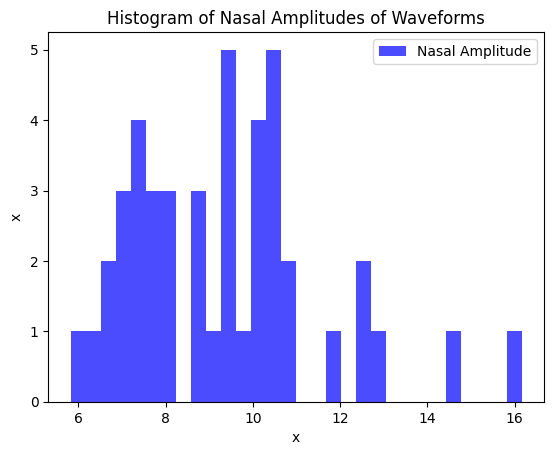

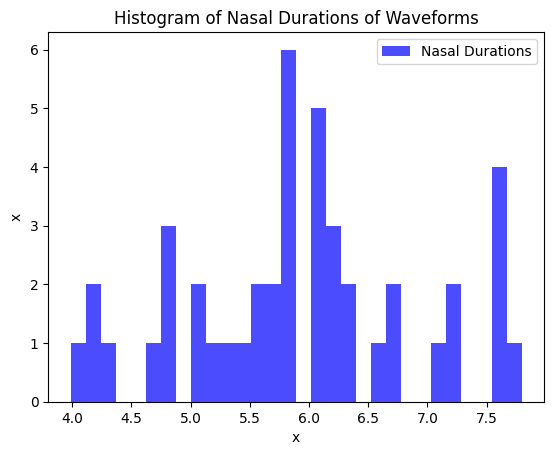

In [31]:
#plotting the amplitude and duration

#line graph
#na = range(len(nasal_amplitudes))
#plt.plot(na  nasal_amplitudes, label='Nasal Amplitude')
#plt.title('Nasal Amplitudes of Waveforms')
#plt.xlabel('Waveform Index')
#plt.ylabel('Amplitude')  
#plt.legend()
#plt.show()

plt.hist(nasal_amplitudes, bins=30, alpha=0.7, color='blue', label='Nasal Amplitude')
plt.title('Histogram of Nasal Amplitudes of Waveforms')
plt.xlabel('x')
plt.ylabel('x')  
plt.legend()
plt.show()

#line graph
#nd = range(len(nasal_durations))
#plt.plot(nd, nasal_durations, label='Nasal Duration')
#plt.title('Nasal Durations of Epochs')
#plt.xlabel('Epochs Index')
#plt.ylabel('Duration') 
#plt.legend()
#plt.show()

plt.hist(nasal_durations, bins=30, alpha=0.7, color='blue', label='Nasal Durations')
plt.title('Histogram of Nasal Durations of Waveforms')
plt.xlabel('x')
plt.ylabel('x')  
plt.legend()
plt.show()

Text(0.5, 1.0, 'Temporal epochs')

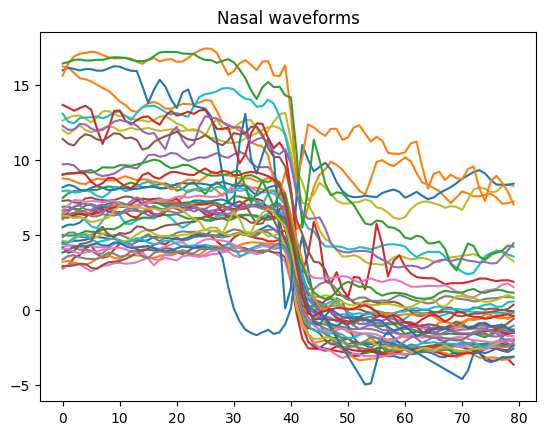

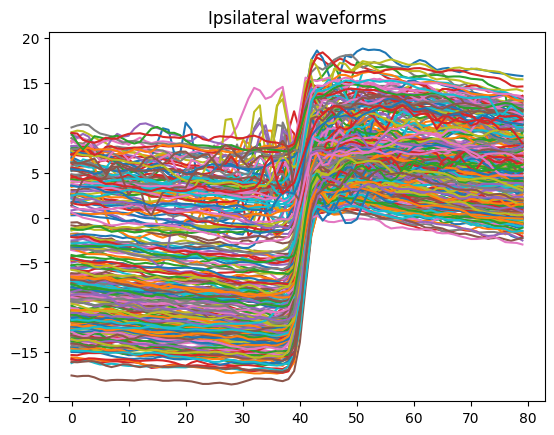

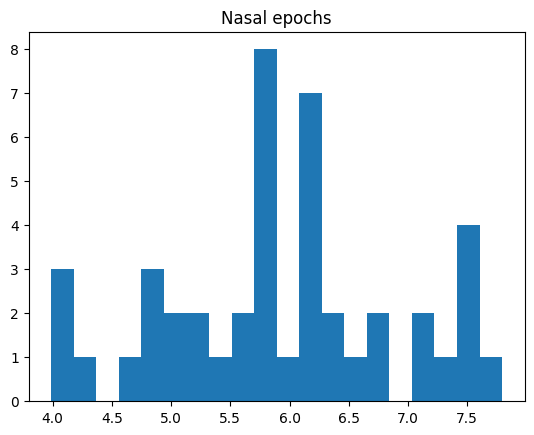

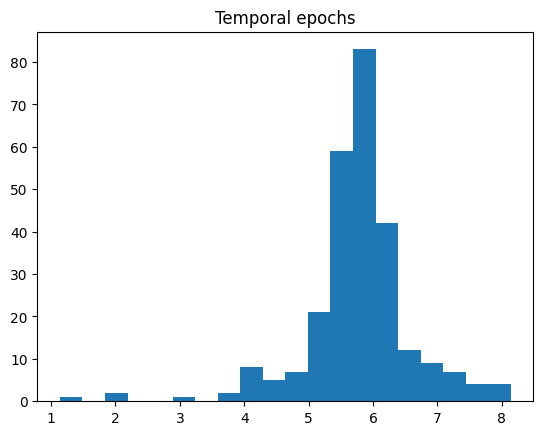

In [32]:
#graph nasal waveforms
fig, ax = plt.subplots()
for saccade in nasal_waveforms:
    ax.plot(saccade) #, alpha=0.1, color="gray")
    plt.title("Nasal waveforms")

#graph temporal waveforms
fig, ax = plt.subplots()
for saccade in temporal_waveforms:
    ax.plot(saccade)# alpha=0.1, color="gray")
    plt.title("Ipsilateral waveforms")
    
#graph nasal epochs
fig, ax = plt.subplots()
ax.hist(np.diff(nasal_epochs, axis=1), bins=20)
plt.title("Nasal epochs")

#graph temporal epochs
fig, ax = plt.subplots()
ax.hist(np.diff(temporal_epochs, axis=1), bins=20)
plt.title("Temporal epochs")


In [ ]:
# 